<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L’analyse en composante principale pour des données numériques en n dimensions est un algorithme non supervisé d’identification des dimensions de variance décroissante et de changement de base pour ne conserver que les k dimensions de plus grande variance. On parle aussi souvent de PCA, de son nom anglais Principal Components Analysis.

L’analyse en composantes principales est utilisée pour extraire et de visualiser les informations importantes contenues dans une table de données multivariées. L’ACP synthétise cette information en seulement quelques nouvelles variables appelées composantes principales. Ces nouvelles variables correspondent à une combinaison linéaire des variables originels. Le nombre de composantes principales est inférieur ou égal au nombre de variables d’origine.

L’information contenue dans un jeu de données correspond à la variance ou l’inertie totale qu’il contient. L’objectif de l’ACP est d’identifier les directions (i.e., axes principaux ou composantes principales) le long desquelles la variation des données est maximale.

En d’autres termes, l’ACP réduit les dimensions d’une donnée multivariée à deux ou trois composantes principales, qui peuvent être visualisées graphiquement, en perdant le moins possible d’information.


## **Objectif : maximiser la variance**
Le but d'une analyse en composantes principales est de trouver une nouvelle base orthonormée dans laquelle représenter nos données, telle que la variance des données selon ces nouveaux axes soit maximisée.


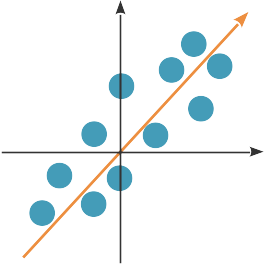

La variance des données selon l'axe orange est grande. Si on projette les points sur cet axe, ils auront tous des coordonnées différentes ; en utilisant cet axe comme unique dimension, on réduit la dimension de nos données (de 2 à 1) mais on continue à pouvoir distinguer les points les uns des autres.

## **Le principe**  

Il s’agit en fait de résumer l’information qui est contenue dans une large base de données en un certain nombre de variables synthétiques appelées : Composantes principales. 

L’idée est ensuite de pouvoir projeter ces données sur l’hyperplan le plus proche afin d’avoir une représentation simple de nos données.
Évidemment, qui dit réduction de dimension dit perte d’informations. C’est là tout l’enjeu que représente une Analyse en Composantes principales. Il faut pouvoir réduire la dimension de nos données tout en conservant un maximum d’informations.


##**L’Analyse en Composantes Principales, un outil de Data Mining**
Il existe plusieurs applications pour l'Analyse en Composantes Principales, parmi lesquelles :

- L'étude et la visualisation des corrélations entre les variables, afin d'éventuellement limiter le nombre de variables à mesurer par la suite ;
- L'obtention de facteurs non corrélés qui sont des combinaisons linéaires des variables de départ, afin d'utiliser ces facteurs dans des méthodes de modélisation telles que la régression linéaire, la régression logistique ou l'analyse discriminante ;
- La visualisation des observations dans un espace à deux ou trois dimensions, afin d'identifier des groupes homogènes d'observations, ou au contraire des observations atypiques.

Un exemple de ce que peut faire une ACP : en 2008, John Novembre et ses collègues ont publié une analyse en composantes principales des génomes de 1387 Européens. La projection des données sur ces deux dimensions correspond assez bien à... la carte de l'Europe ! Ce résultat a été publié dans la revue Nature.

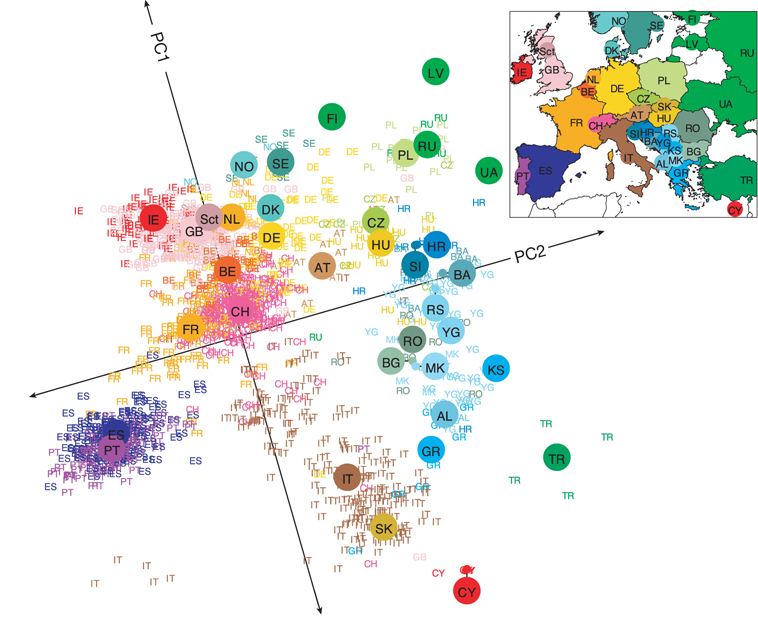

## **Exemple pour la fonction Analyse en composantes principales**

Une banque demande huit informations aux demandeurs de prêt : revenus, niveau de formation, âge, ancienneté à l'adresse actuelle, ancienneté auprès de l'employeur actuel, épargne, endettement et nombre de cartes de crédit. Un administrateur de la banque veut analyser ces données pour déterminer la meilleure façon de les regrouper et d'en faire un rapport. L'administrateur collecte ces informations pour 30 demandeurs de prêt.

Le directeur réalise une analyse en composantes principales pour réduire le nombre de variables et simplifier l'analyse des données. Il souhaite avoir suffisamment de composantes pour expliquer 90 % de la variation des données.



## **Interprétation des résultats**
La première composante principale rend compte de 44,3 % de la variance totale. Les variables qui présentent la plus forte corrélation avec la première composante principale (CP1) sont Age (0,484), Résidence (0,466), Emploi (0,459) et Epargne (0,404). La première composante principale est corrélée de manière positive avec l'ensemble de ces quatre variables. Par conséquent, le fait d'accroître les valeurs Age, Résidence, Emploi et Epargne augmente la valeur de la première composante principale. Les quatre premières composantes principales expliquent 90,7 % de la variation des données. Par conséquent, le directeur décide d'utiliser les composantes pour analyser les demandes de prêt.

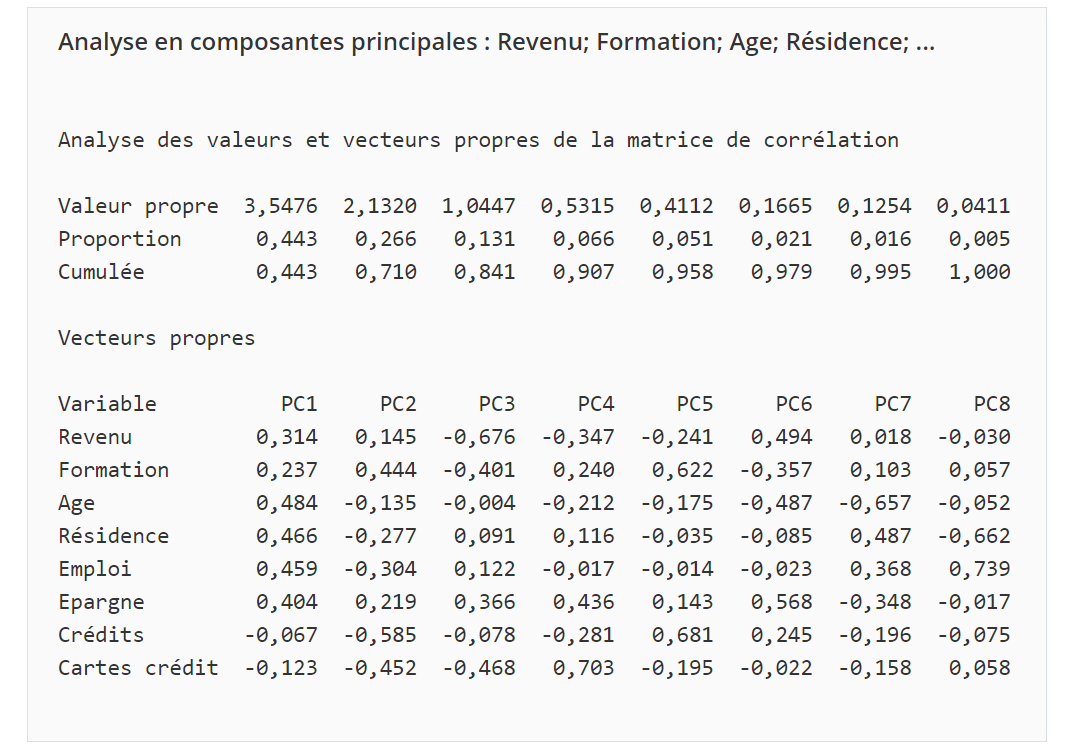

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
# import de l'ensemble de données
iris = datasets.load_iris()
X = iris.data
y = iris.target
cibles = iris.target_names
print(cibles)

['setosa' 'versicolor' 'virginica']


Ensuite, nous examinons l’ensemble des données « iris » qui est assez populaire dans la littérature sur l’apprentissage automatique. Celui-ci contient trois classes, chacune représente un type de la plante iris.

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Species'] = iris['target']
df['Species'] = df['Species'].apply(lambda x: iris['target_names'][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Dans le code suivant, on visualise à l’aide des bibliothèques Seaborn et Matplotlib les classes qui sont séparées en fonction des différentes caractéristiques.

Dans un premier temps, on affiche les classes de l’ensemble des données en fonction de sepal length et sepal width, ensuite en fonction de petal length et petal width.

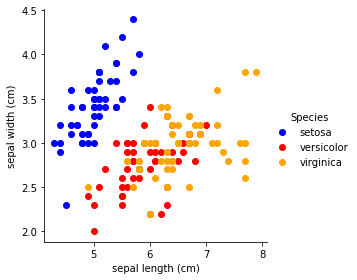

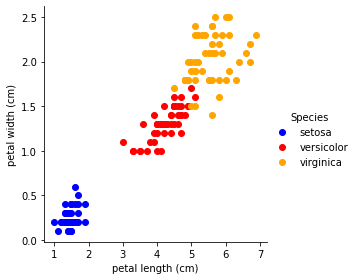

In [7]:
couleur = {'Setosa' : 'blue', 'Versicolor' : 'red', 'Virginica' : 'orange'}
#Voyons comment les classes sont séparées en fonction des différentes caractéristiques
sns.FacetGrid(df, hue = "Species", height = 4,
palette = couleur.values()).map(plt.scatter, "sepal length (cm)",
"sepal width (cm)").add_legend()
sns.FacetGrid(df, hue = "Species", height = 4,
palette = couleur.values()).map(plt.scatter, "petal length (cm)",
"petal width (cm)").add_legend()
plt.show()

La matrice de corrélation peut aider à mieux comprendre un ensemble de données. Pour notre exemple de dataset « iris », elle va nous indique comment les quatre caractéristiques sont corrélées.

En utilisant la bibliothèque seaborn, on obtient facilement la matrice de corrélation, qui à partir de laquelle on peut remarquer une forte corrélation entre les caractéristiques sepal length et sepal width.

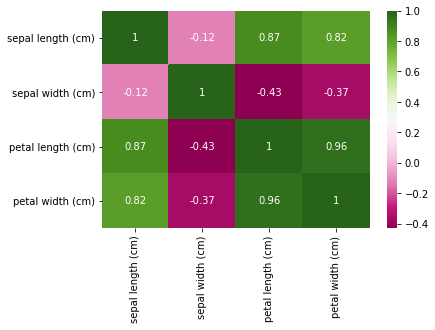

In [8]:
#creer une matrice de correlation
df.corr()
sns.heatmap(df.corr(), cmap = 'PiYG', annot = True)

Dans le code suivant, nous allons normaliser nos caractéristiques avant d’appliquer le PCA à deux composantes afin de représenter les données en deux dimensions

In [9]:
#normalisation des données en utilisant standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## PCA avec deux composantes
Après avoir normalisé les données, on transforme les caractéristiques en utilisant le PCA.

Le PCA à deux composantes nous aide à visualiser l’ensemble de données « iris », on peut remarquer que la classe « Setorsa » est très différente des deux autres classes. On calcule également la variance expliquée qui nous indique la part de variance que prennent les deux composantes. On obtient alors un résultat de 95,8% qui signifie que les deux composantes principales absorbent 95.8% de la variance qui veut dire que la représentation en deux dimensions est significative.

Remarque :

Avec un résultat inférieur à 85%, la représentation des données en deux dimensions peut ne pas être valide.

variance expliquée pour chaque composantes: [0.72962445 0.22850762]


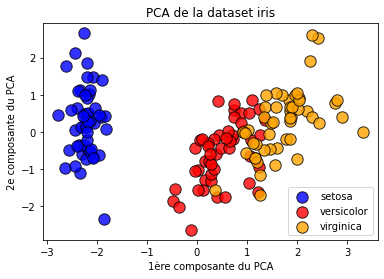

In [11]:
#L’analyse en composantes principales PCA
pca = PCA(n_components=2)
X_reduit = pca.fit_transform(X)
for color, i, cibles in zip(couleur.values(), [0, 1, 2], cibles):
  plt.scatter(X_reduit[y == i, 0], X_reduit[y == i, 1], color = color, alpha = .8,
              label = cibles, s = 130, edgecolors = 'k')
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.xlabel("1ère composante du PCA")
plt.ylabel("2e composante du PCA")
plt.title('PCA de la dataset iris')
# pourcentage de la variance expliquée pour chaque composantes
print('variance expliquée pour chaque composantes: %s' % str(pca.explained_variance_ratio_))
plt.show()

## PCA avec trois composantes
Nous allons tracer dans ce qui suit les trois premières composantes du PCA afin de mieux comprendre l’interaction des caractéristiques.

variance expliquée pour chaque composantes: [0.92461872 0.05306648 0.01710261]


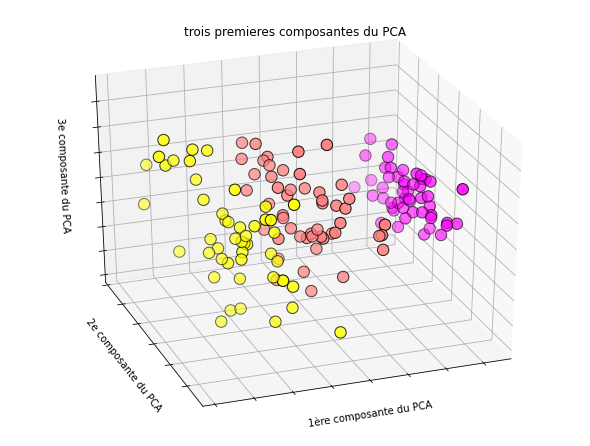

In [12]:
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure(1, figsize = (8, 6))
axe = Axes3D(figure, elev =- 150, azim = 110)
pca3 = PCA(n_components = 3)
X_reduit = pca3.fit_transform(iris.data)
axe.scatter(X_reduit[:, 0], X_reduit[:, 1], X_reduit[:, 2], c = y, cmap = plt.cm.spring, edgecolor = 'k', s = 130)
axe.set_title("trois premieres composantes du PCA")
axe.set_xlabel("1ère composante du PCA")
axe.w_xaxis.set_ticklabels([])
axe.set_ylabel("2e composante du PCA")
axe.w_yaxis.set_ticklabels([])
axe.set_zlabel("3e composante du PCA")
axe.w_zaxis.set_ticklabels([])
# pourcentage de la variance expliquée pour chaque composantes
print('variance expliquée pour chaque composantes: {}'.format(pca3.explained_variance_ratio_))
plt.show()

## LDA (Linear discriminant analysis) avec deux composantes
Dans la partie du code suivant, on calcule les deux premières composantes du LDA et on les visualise.

Remarquons que la classe « Setosa » est encore une fois séparée des données des deux autres classes. On peut aussi constater que le LDA est plus performant que le PCA pour maintenir le chevauchement à un minimum entre les deux classes « Versicolor » et « Virginica ».

variance expliquée pour chaque composantes: [0.9912126 0.0087874]


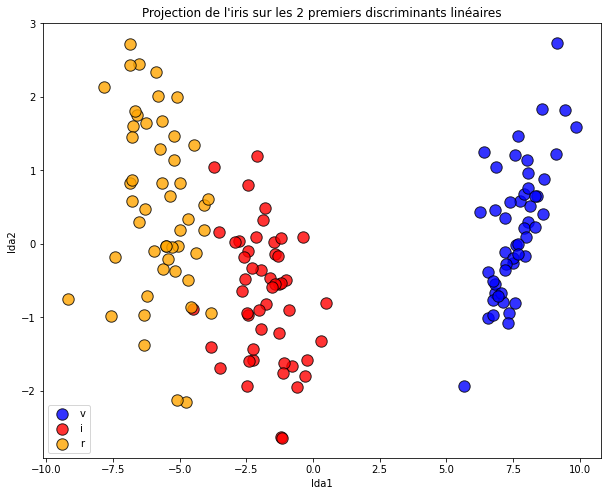

In [14]:
couleur = {'Setosa' : 'blue','Versicolor' : 'red','Virginica' : 'orange'}
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_reduit = lda.transform(X)
plt.figure(figsize = (10,8))
for cl, i, cible in zip(couleur.values(), [0, 1, 2], cibles):
  plt.scatter(X_reduit[y == i, 0], X_reduit[y == i, 1], alpha = .8, color = cl,
              label = cible, s = 130, edgecolors = 'k')
plt.legend(loc = 3, shadow = False, scatterpoints = 1)
plt.xlabel('lda1')
plt.ylabel('lda2')
plt.title("Projection de l'iris sur les 2 premiers discriminants linéaires")
print('variance expliquée pour chaque composantes: {}'.format(lda.explained_variance_ratio_))
plt.show()